In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 第一题

In [3]:
data = pd.read_excel(r"C:\Users\柠檬\Desktop\实验 3\第5章  抽样估计.xlsx",sheet_name=1)
data

,学生编号,月消费支出额（元）
0,1,410
1,2,350
2,3,466
3,4,385
4,5,500
...,...,...
105,106,811
106,107,1109
107,108,1276
108,109,745


## 1. 大样本条件下总体区间均值的区间估计

### 步骤1：计算样本均值和样本标准差

In [4]:
average = data['月消费支出额（元）'].mean()
print("样本均值：",average)

样本均值： 597.0181818181818


In [5]:
standard_deviation = np.std(data['月消费支出额（元）'], ddof=1)
print("样本标准差：",standard_deviation)

样本标准差： 156.96291748229515


### 步骤2：计算边际误差或允许误差

#### 求抽样标准差

In [6]:
sampling_standard_deviation = standard_deviation / math.sqrt(110)
sampling_standard_deviation

14.965826971821139

#### 求正态分布位数

In [7]:
z = stats.norm.ppf(0.025,loc=0,scale=1)
z

-1.9599639845400545

#### 计算边际误差

In [8]:
E = math.fabs(z * sampling_standard_deviation)
E

29.332481863627578

### 步骤3：确定总体均值置信区间

In [9]:
l = average - E
r = average + E
print("置信区间为：（%.2lf,%.2lf）"%(l,r))

置信区间为：（567.69,626.35）


### 结论

在置信水平为95%的条件下，110名学生的月销售额估计的该校学生的月销售额的置信区间为567.69-626.35

## 2. 小样本条件下总体区间均值的区间估计

In [10]:
sample = data.iloc[random.sample(range(110),20)]
sample

,学生编号,月消费支出额（元）
6,7,401
2,3,466
107,108,1276
82,83,538
103,104,663
12,13,510
58,59,536
54,55,446
48,49,650
7,8,493


### 步骤1：计算样本均值和样本标准差

In [11]:
average_sample = sample['月消费支出额（元）'].mean()
print("样本均值：",average_sample)

样本均值： 595.95


In [12]:
standard_deviation_sample = np.std(sample['月消费支出额（元）'], ddof=1)
print("样本标准差：",standard_deviation_sample)

样本标准差： 213.20103559539143


### 步骤2：计算边际误差或允许误差

#### 求抽样标准差

In [13]:
sampling_standard_deviation_sample = standard_deviation_sample / math.sqrt(20)
sampling_standard_deviation_sample

47.67320084646476

#### 求服从自由度为n-1的t分布位数

In [14]:
z_t = stats.t.ppf(1-0.025,19)
z_t

2.093024054408263

#### 计算边际误差

In [15]:
E_sample = math.fabs(z_t * sampling_standard_deviation_sample)
E_sample

99.7811561222871

### 步骤3：确定总体均值置信区间

In [16]:
l_sample = average_sample - E_sample
r_sample = average_sample + E_sample
print("置信区间为：（%.2lf,%.2lf）"%(l_sample,r_sample))

置信区间为：（496.17,695.73）


### 结论

在置信水平为95%的条件下，20名学生的月销售额估计的该校学生的月销售额的置信区间为507.75-658.55

# 第二题

In [17]:
df = pd.read_excel(r"C:\Users\柠檬\Desktop\实验 3\香水.xlsx")
df

,商品名称,产品毛重,商品产地,包装,香调,净含量,分类,性别,适用场所,价格,评价
0,冰希黎6956008601463,10.00g,中国大陆上海,Q版香水,花果香调,1ml-15ml,浓香水EDP,女,日常，约会，情趣，商务，party聚会，旅行,9.9,1.9万+
1,冰希黎6956008601432,200.00g,中国大陆上海,Q版香水,混合香调,1ml-15ml,浓香水EDP,女,日常，约会，party聚会，运动，旅行,9.9,1.9万+
2,（免邮）上海老国货艾琳法国茉莉女士香水75ml EDP 持久淡香清新花香调,160.00g,NaN,独立装,花果香调,31ml-100ml,浓香水EDP,女,日常，约会，商务，party聚会，旅行,18.0,90+
3,法颂浪漫梦境女士香膏15g 持久淡香清新固体精油香水香体膏 女士持久淡香礼盒,15.00g,NaN,Q版香水,花果香调,1ml-15ml,固体香水/香膏,女,日常，约会，商务，party聚会，运动，旅行,22.0,30+
4,雅芳香水,30.00g,中国大陆,独立装,东方香调,1ml-15ml,淡香水EDT,女,日常，约会，商务，party聚会，运动，旅行,23.9,3.9万+
...,...,...,...,...,...,...,...,...,...,...,...
1004,香奈儿香水,300.00g,法国,独立装,花果香调,31ml-100ml,浓香水EDP,女,日常，约会，商务，party聚会，旅行,1420.0,5000+
1005,香奈儿机会/机遇/黄色邂逅女士香水50/100ML/持久淡香精EDP EDP50ml,20.00g,NaN,独立装,花果香调,31ml-100ml,浓香水EDP,女,约会,1850.0,3
1006,Chanel香奈儿 COCO可可小姐 淡香水EDT 白色 EDP 100ml,200.00g,NaN,礼品套装,花果香调,31ml-100ml,淡香水EDT,女,日常，约会,1996.0,0
1007,Dior克丽丝汀迪奥女士香水套装 魅惑+花漾+真我各50ml三件套,200.00g,NaN,独立装,东方香调,31ml-100ml,淡香水EDT,女,日常，约会，商务，party聚会，运动，旅行,2200.0,10+


## 进行数据分析

### 香水分类

In [18]:
table1 = pd.pivot_table(df,index=["分类"],
               values=["商品名称"],
               aggfunc=[np.count_nonzero],fill_value=0,margins=True)
table1

,count_nonzero
,商品名称
分类,
其它,60
发香雾,12
古龙水,2
固体香水/香膏,3
浓香水EDP,265
淡香水EDT,651
淡香水EDT，古龙水,3
香体走珠,6


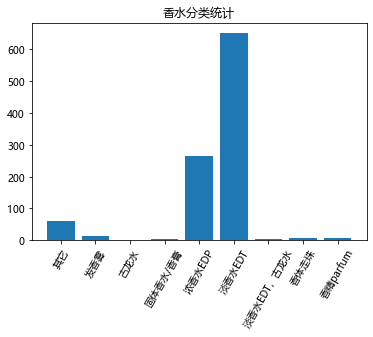

In [19]:
plt.bar(np.array(table1.index[0:9]),table1.values[0:9,0])
plt.xticks(rotation=60)
plt.title('香水分类统计')
plt.show()

通过以上可以看出，香水的分类还是比较丰富的，同时可以看出浓香水EDP和淡香水EDT的商品数量较多，占据绝大部分市场份额

### 香水香调

In [20]:
table2 = pd.pivot_table(df,index=["香调"],
               values=["商品名称"],
               aggfunc=[np.count_nonzero],fill_value=0,margins=True)
table2

,count_nonzero
,商品名称
香调,
东方香调,60
其它,68
木质香调,46
木质香调，东方香调，混合香调,1
海洋香调,3
混合香调,121
花果香调,702
花果香调，东方香调,1


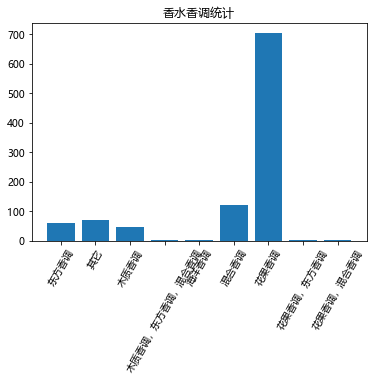

In [21]:
plt.bar(np.array(table2.index[0:9]),table2.values[0:9,0])
plt.xticks(rotation=60)
plt.title('香水香调统计')
plt.show()

通过以上可以看出，香水的香调十分丰富的，同时可以看出香水商品主要以花果香调为主，占据了70%的比例

### 香水包装

In [22]:
table3 = pd.pivot_table(df,index=["包装"],
               values=["商品名称"],
               aggfunc=[np.count_nonzero],fill_value=0,margins=True)
table3

,count_nonzero
,商品名称
包装,
Q版香水,56
其它,44
独立装,795
礼品套装,72
组合装,20
限量版装,20
All,1007


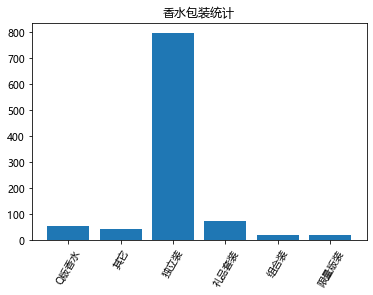

In [23]:
plt.bar(np.array(table3.index[0:6]),table3.values[0:6,0])
plt.xticks(rotation=60)
plt.title('香水包装统计')
plt.show()

通过以上可以看出，可以看出香水商品主要以独立包装为主，占据了接近80%的比例

### 产品净含量 

In [24]:
table4 = pd.pivot_table(df,index=["净含量"],
               values=["商品名称"],
               aggfunc=[np.count_nonzero],fill_value=0,margins=True)
table4

,count_nonzero
,商品名称
净含量,
101ml-200ml,13
16ml-30ml,147
1ml-15ml,103
200ml以上,6
31ml-100ml,594
其它,144
All,1007


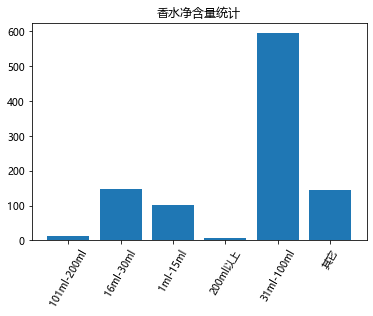

In [25]:
plt.bar(np.array(table4.index[0:6]),table4.values[0:6,0])
plt.xticks(rotation=60)
plt.title('香水净含量统计')
plt.show()

通过以上可以看出，可以看出香水精含量主要以31ml-100ml为主，也代表大部分香水消费者的使用习惯